## 流程

内容：</br>
包括数据流水线、模型、损失函数、小批量随机梯度下降优化器

## 代码

In [20]:
%matplotlib inline
import random
import torch
import numpy
from d2l import torch as d2l

### 1. 构造人造数据集（知道真实的w,b）

In [14]:
def synthetic_data(w,b, num_examples):
    '''生成y=Xw+b+噪声'''
    X = torch.normal(0,1,(num_examples, len(w))) # 正态分别：均值为0，方差为1；行数-num_examples, 列数-w
    y = torch.matmul(X,w)+b
    y += torch.normal(0, 0.01, y.shape)
    print(y.shape)
    return X, y.reshape((-1,1))

torch.Size([1000])
features: tensor([ 1.9704, -0.4477]) 
labels: tensor([9.6807])


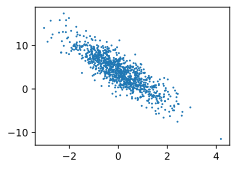

In [28]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabels:', labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

In [45]:
# 根据batch_size输出数据
def data_iter(features, labels, batch_size):
    num_iter = len(features)
    indices = list(range(num_iter))
    # 打乱样本，保证随机读取
    random.shuffle(indices)
    # print(indices)
    # 读取样本
    for i in range(0, num_iter, batch_size):
        batch_indices = indices[i:min(i+batch_size, num_iter)]
        # print("batch_indices:", batch_indices)
        yield features[batch_indices], labels[batch_indices]

In [46]:
batch_size = 10
for X, y in data_iter(features, labels, batch_size):
    print(X, '\n', y)
    print("features.shape:", features.shape)
    print("labels.shape:", labels.shape)
    print("X.shape:", X.shape)
    print("y.shape:", y.shape)
    break;

tensor([[ 0.0168, -0.2381],
        [ 0.1383, -1.2142],
        [-1.0474, -0.8001],
        [ 1.2970,  1.9368],
        [-0.2888, -1.8345],
        [ 1.0892,  0.8611],
        [ 1.1794,  0.4935],
        [ 2.3316,  0.9097],
        [-0.7303, -1.0352],
        [ 1.0778,  0.7073]]) 
 tensor([[5.0084],
        [8.6105],
        [4.8111],
        [0.2049],
        [9.8611],
        [3.4579],
        [4.8669],
        [5.7665],
        [6.2495],
        [3.9344]])
features.shape: torch.Size([1000, 2])
labels.shape: torch.Size([1000, 1])
X.shape: torch.Size([10, 2])
y.shape: torch.Size([10, 1])


### 2. 模型

### 疑问：

1. param.grad()的理解：为什么需要除以batch_size, 为什么要grad_zero_()

In [58]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 定义线性回归模型
def linear(X, w, b):
    return torch.matmul(X, w) + b

# 定义损失函数(平方损失函数)
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# 定义优化算法（小批量随机梯度下降）
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # /batch_size对loss求平均
            param.grad.zero_()

## 3. 训练

### 疑问

1. l.sum().backward() 的理解：backward()什么作用呢？

2. 输出结果中 print(f'')函数

In [56]:
lr = 0.01
num_epoch = 10
net = linear
loss = squared_loss

for epoch in range(num_epoch):
    for X, y in data_iter(features, labels, batch_size):
        # 计算loss
        l = loss(net(X, w, b), y)
        # 更新梯度
        l.sum().backward()
        sgd((w, b), lr, batch_size)
        
    # 输出结果
    with torch.no_grad():
        train_loss = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_loss.mean()):f}')

epoch 1, loss 0.007906
epoch 2, loss 0.001231
epoch 3, loss 0.000229
epoch 4, loss 0.000077
epoch 5, loss 0.000054
epoch 6, loss 0.000050
epoch 7, loss 0.000050
epoch 8, loss 0.000050
epoch 9, loss 0.000049
epoch 10, loss 0.000049
